In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!pip install torchvision==0.13.0 torch==1.12.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 2.1 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.0+cu116
    Uninstalling torch-1.13.0+cu116:
      Successfully uninstalled torch-1.13.0+cu116
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.0+cu116
    Uninstalling torchvision-0.14.0+cu116:
      Successfully uninstalled torchvision-0.14.0+cu116
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.14.0 requires torch==1.13.0, but you have torch 1.12.0 which is incompatible.
torchaudio 0.13.0+cu116 requires torch==1.13.0, but you have torch 1.12.0 which is incompatible.


In [ ]:
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 3.9 MB/s eta 0:00:00


In [ ]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.4/512.4 KB 21.9 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
from torchmetrics import AUROC
import io
import matplotlib.pyplot as plt
import time
import os
import copy
from glob import glob
from tqdm import tqdm

import warnings
import pandas as pd
from sklearn.metrics import f1_score,accuracy_score,recall_score,roc_auc_score,roc_curve
warnings.simplefilter('ignore')


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
print(torch.cuda.get_device_name())

cuda:0
Tesla T4


In [ ]:
!pip install split-folders

import splitfolders as sf

sf.ratio('gdrive/MyDrive/Marwan/Dataset','output',ratio=(0,1,0),seed=42)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 6400 files [02:20, 45.56 files/s] 


# learn

In [ ]:
count_mildDem = 0
count_moderateDem = 0
count_nonDem = 0
count_veryMildeDem = 0
count_mildDem2 = 0
count_moderateDem2 = 0
count_nonDem2 = 0
count_veryMildeDem2 = 0
count_mildDem3 = 0
count_moderateDem3 = 0
count_nonDem3 = 0
count_veryMildeDem3 = 0

In [ ]:
from torch.utils.data import WeightedRandomSampler

In [ ]:
BATCH_SIZE=24
EPOCH=60
LEARNING_RATE=0.0001

data_transforms = {
    "train" :
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}
image_datasets = {}
data_dir = 'gdrive/MyDrive/Marwan'
image_datasets["train"] = datasets.ImageFolder(os.path.join(data_dir, "Dataset"),data_transforms["train"])
# data_dir2 = 'gdrive/MyDrive/Marwan/Alzheimer_s Dataset'
# image_datasets["test"] = datasets.ImageFolder(os.path.join(data_dir2, "test"),
#                                         data_transforms["test"])


# for i in image_datasets["train"].imgs:
#   if i[1] == 0:
#     count_mildDem += 1
#   elif i[1] == 1:
#     count_moderateDem += 1
#   elif i[1] == 2:
#     count_nonDem += 1
#   else:
#     count_veryMildeDem += 1

# for i in image_datasets["val"].imgs:
#   if i[1] == 0:
#     count_mildDem2 += 1
#   elif i[1] == 1:
#     count_moderateDem2 += 1
#   elif i[1] == 2:
#     count_nonDem2 += 1
#   else:
# #     count_veryMildeDem2 += 1

# for i in image_datasets["test"].imgs:
#   if i[1] == 0:
#     count_mildDem3 += 1
#   elif i[1] == 1:
#     count_moderateDem3 += 1
#   elif i[1] == 2:
#     count_nonDem3 += 1
#   else:
#     count_veryMildeDem3 += 1

# lis = [count_mildDem,count_moderateDem,count_nonDem,count_veryMildeDem]
# lis2 = [count_mildDem2,count_moderateDem2,count_nonDem2,count_veryMildeDem2]
# lis3 = [count_mildDem3,count_moderateDem3,count_nonDem3,count_veryMildeDem3]
# class_weights = [sum(lis)/ c for c in lis]
# class_weights2 = [sum(lis2)/ c for c in lis2]
# class_weights3 = [sum(lis3)/ c for c in lis3]

# example_weights = [class_weights[i[1]] for i in image_datasets["train"].imgs]
# example_weights2 = [class_weights2[i[1]] for i in image_datasets["val"].imgs]
# example_weights3 = [class_weights3[i[1]] for i in image_datasets["test"].imgs]

# sampler = WeightedRandomSampler(example_weights, len(image_datasets["train"].imgs))
# sampler2 = WeightedRandomSampler(example_weights2, len(image_datasets["val"].imgs))
# sampler3 = WeightedRandomSampler(example_weights3, len(image_datasets["test"].imgs))

dataloaders = {
    # 'train': torch.utils.data.DataLoader(image_datasets['train'], batch_size=BATCH_SIZE, sampler = sampler,
    #                                         shuffle=False, num_workers=4),
    # 'val': torch.utils.data.DataLoader(image_datasets['val'], batch_size=BATCH_SIZE, #sampler = sampler2,
    #                                         shuffle=True, num_workers=4),
    'train': torch.utils.data.DataLoader(image_datasets["train"], batch_size=BATCH_SIZE, #sampler = sampler3,
                                            shuffle=True, num_workers=4)
                                            }

dataset_sizes = {x: len(image_datasets[x]) for x in ["train"]}
class_names = image_datasets['train'].classes

In [ ]:
!pip install vit_pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 5.8 MB/s eta 0:00:00


torch.Size([3, 680, 1810])


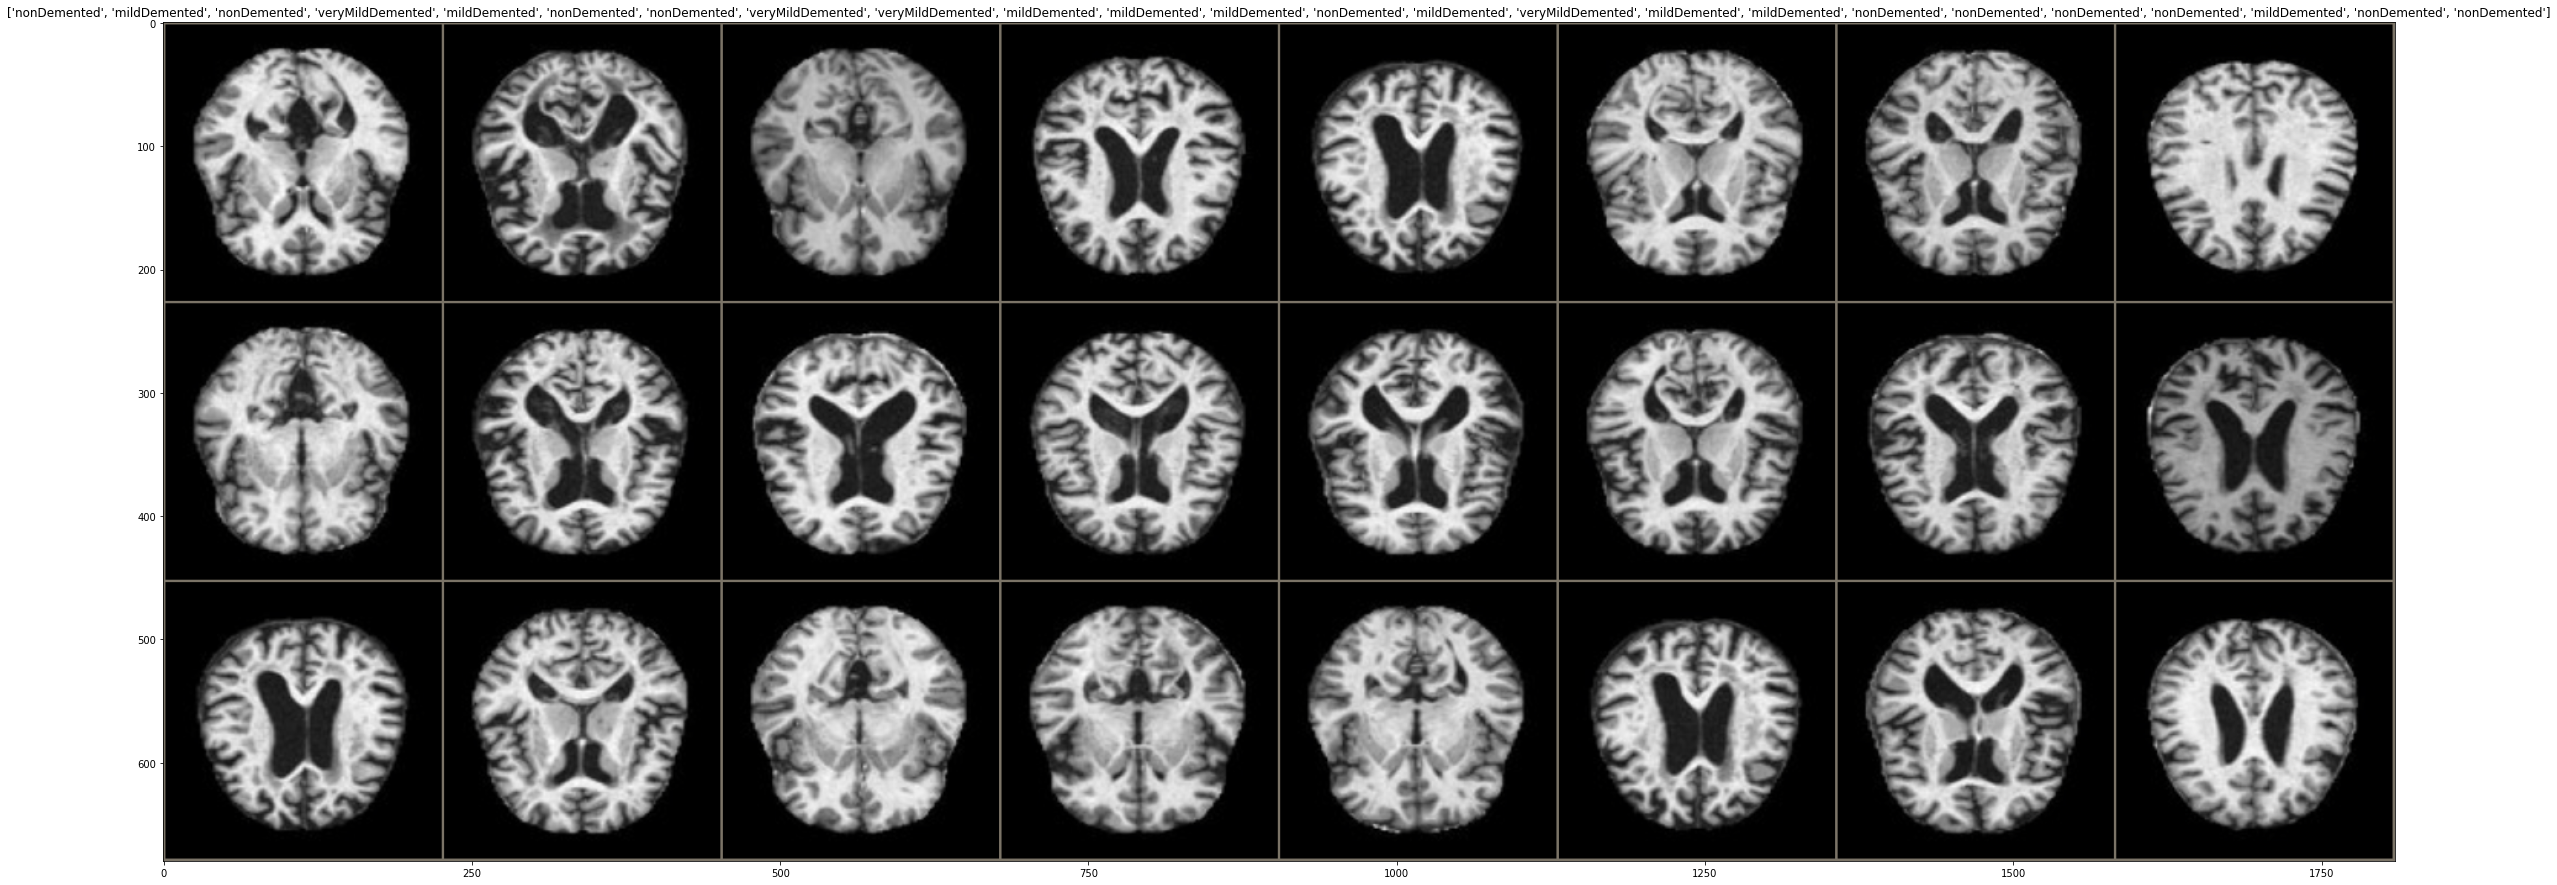

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    print(inp.shape)
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(40,40))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) 

inputs, classes = next(iter(dataloaders['train']))

out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
def train_model(model, criterion, optimizer, scheduler, name, num_epochs=25, feature_extractor = None):

    try:

        os.mkdir('modelPerformance')
        os.mkdir(f'modelPerformance/{name}')
    except:
        print('directory exists')

    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    

    for epoch in range(num_epochs):

        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

        for phase in ['train', 'test']:
            if phase == 'train':
                model.train()  
            else:
                model.eval()   

            running_loss = 0.0
            running_corrects = 0
            
            epoch=int(len(image_datasets[phase])/BATCH_SIZE)
            
            for _ in tqdm(range(epoch)):
                inputs, labels = next(iter(dataloaders[phase]))
                #inputs = feature_extractor(images=inputs, return_tensors="pt")
                inputs = inputs.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)

                    outputs = outputs.logits

                    _, preds = torch.max(outputs, 1)

                    labels = labels.to(device)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()
            
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(        
                phase, epoch_loss, epoch_acc))
    
            
            if phase == 'test' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                torch.save(model,'/content/modelPerformance/{}/best_model_{:.4f}acc_{}epochs.h5'.format(name,epoch_acc,num_epochs))

                train_losses = []
                valid_losses = []

        print()


    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    
    with open(f'/content/modelPerformance/{name}/'+sorted(os.listdir(f'/content/modelPerformance/{name}/'))[-1], 'rb') as f:
        buffer = io.BytesIO(f.read())
    model=torch.load(buffer)
    model.load_state_dict(best_model_wts)

    return model

In [ ]:
import torch
torch.cuda.empty_cache()


In [ ]:
import gc
gc.collect()


2517

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 95.8 MB/s eta 0:00:00


In [ ]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224', ignore_mismatched_sizes=True, num_labels=4 , attention_probs_dropout_prob=0.2, hidden_dropout_prob=0.25)


Downloading:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
'/content/modelPerformance/CrossFormer/'+sorted(os.listdir('/content/modelPerformance/CrossFormer'))[-1]

'/content/modelPerformance/CrossFormer/best_model_0.5262acc_10epochs.h5'

In [ ]:
best_model=torch.load('/content/modelPerformance/CrossFormer/'+sorted(os.listdir('/content/modelPerformance/CrossFormer'))[-1])

In [ ]:
type(best_model)

transformers.models.beit.modeling_beit.BeitForImageClassification

In [ ]:
torch.save(best_model.state_dict(), "gdrive/MyDrive/Marwan/beit1.pth")

In [ ]:
model.load_state_dict(torch.load("gdrive/MyDrive/Marwan/google_vit3.pth"))
model.eval()

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.25, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0): ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.2, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.25, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, ou

In [ ]:
model_ft = model.to(device)

In [ ]:
from torchmetrics.classification import MulticlassF1Score

In [ ]:
import numpy

accuracies = []
y_pred = []
y_true = []
scores = []

def test_model(model ,device, test_loader):
        correct = 0
        total = 0
        with torch.no_grad():
            for data in test_loader:
                images, labels = data[0].to(device), data[1].to(device)
                y_true.extend(labels.cpu().numpy())
                #metric = MulticlassF1Score(num_classes=4).to(device)
                outputs = model_ft(images)
                scores.extend(outputs.logits.cpu())
                _, predicted = torch.max(outputs.logits, 1)
                y_pred.extend(predicted.cpu().numpy())
                # acc = metric(outputs.logits,labels)
                # accuracies.append(acc)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        print('Correct Prediction: {:d}  Total Images: {:d}'.format(correct, total))
        print('Test Accuracy = {:f}'.format(correct / total))

test_model(model_ft,'cuda',dataloaders['train'])
#print(f"f1 score = {sum(accuracies)/ len(accuracies)}")

Correct Prediction: 6070  Total Images: 6400
Test Accuracy = 0.948438


In [ ]:
print(scores)

[tensor([-1.5864,  4.8249, -2.7884,  2.7349]), tensor([-1.9565e+00, -3.9840e-03, -3.9064e+00,  5.9870e+00]), tensor([-2.5795, -4.7291, -1.6951,  6.5972]), tensor([-2.9557, -5.0687,  6.4956, -2.8362]), tensor([-4.9645, -5.3899,  5.3391,  0.2039]), tensor([-1.7432, -4.0007,  4.6100, -1.6666]), tensor([-4.9257, -4.4250, -0.9038,  7.4673]), tensor([-2.3795, -5.1456,  6.4863, -3.0305]), tensor([ 3.1945, -0.9120, -1.8957, -0.3464]), tensor([-5.0402, -2.3434, -1.4151,  6.6166]), tensor([-3.1468, -4.4300,  7.1148, -2.6384]), tensor([-4.5872, -4.2162,  6.1758, -1.4091]), tensor([-3.3828, -3.4711,  7.5650, -4.2188]), tensor([-2.1506, -7.1362,  1.9992,  2.6511]), tensor([ 0.6675, -4.8876,  0.6015,  1.3310]), tensor([ 1.1849, -4.5995,  0.0248,  0.3962]), tensor([-3.9347, -1.8880, -2.6746,  7.4192]), tensor([-4.6983, -4.1106,  7.2388, -2.5965]), tensor([-3.9059, -4.5801,  7.3397, -3.1748]), tensor([ 4.7002, -5.7105,  0.0064, -1.1394]), tensor([-2.8613, -5.5051, -1.4944,  6.7177]), tensor([ 9.1017, 

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)


In [ ]:
# count_mildDem = 0
# count_moderateDem = 0
# count_nonDem = 0
# count_veryMildeDem = 0

class_names = ('mildDemented', 'moderateDemented', 'nonDemented', 'veryMildDemented')
 
# Create pandas dataframe
dataframe = pd.DataFrame(cf_matrix, index=class_names, columns=class_names)


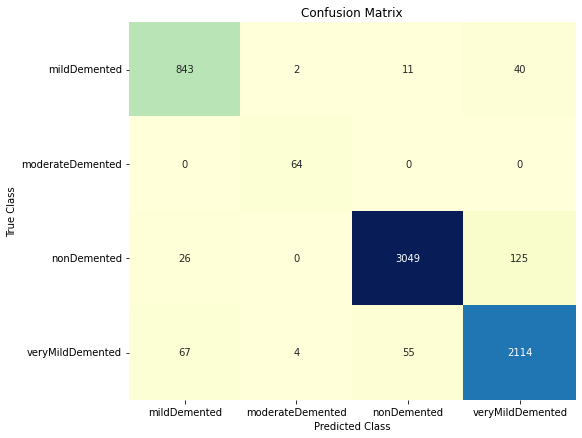

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
 
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None,cmap="YlGnBu",fmt="d")
 
plt.title("Confusion Matrix"), plt.tight_layout()
 
plt.ylabel("True Class"), 
plt.xlabel("Predicted Class")
plt.show()

In [ ]:
precision midldDemented Model1 Validation: 0.9408
precision moderateDemented Model1 Validation: 1.00
precision nonDemented Model1 Validation: 0.9528
precision veryMildDemented Model1 Validation: 0.9438
Recall midldDemented Model1 Validation: 0.9006
Recall moderateDemented Model1 Validation: 0.9143
Recall nonDemented Model1 Validation: 0.9788
Recall veryMildDemented Model1 Validation: 0.9276